Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и получить с помощью модели прогнозы результативного признака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [1]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

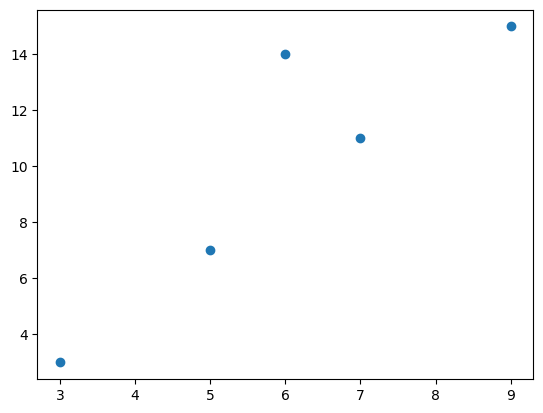

In [3]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [4]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [5]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


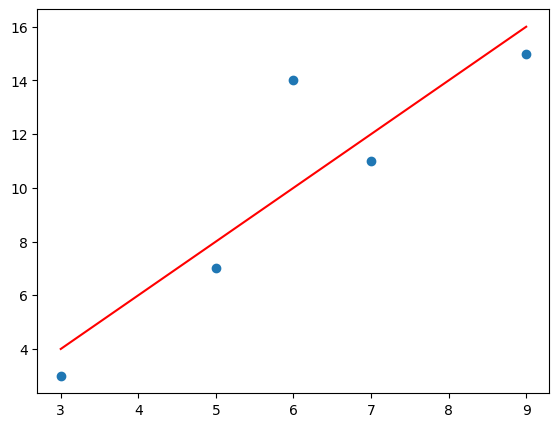

In [6]:
#Изобразим на графике исходные данные и прогнозы 
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [7]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def fit(self, x, Y):
        alpha = 0.01
        dT_a0 = -2*(Y -self.predict(x)).mean()
        dT_a1 = -2*((Y -self.predict(x))*x).mean()
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

MSE после инициализации: 120.0


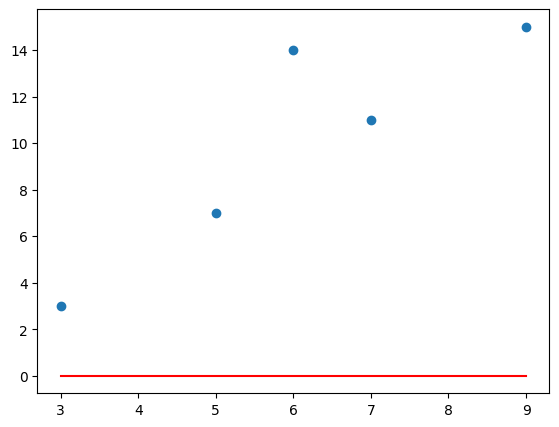

In [8]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')


print(f"MSE после инициализации: {regr.MSE(x, Y)}")

MSE после инициализации: 8.328000000000001


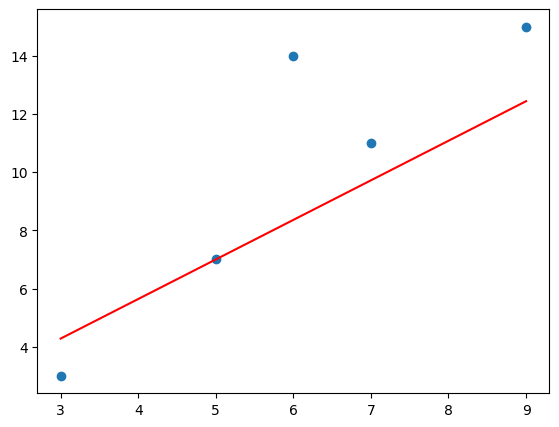

In [9]:
#Выведем прогнозы до градиентного спуска на графике
regr.fit(x, Y)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
print(f"MSE после инициализации: {regr.MSE(x, Y)}")

MSE после первого шага градиентного спуска:  4.6288646400000015


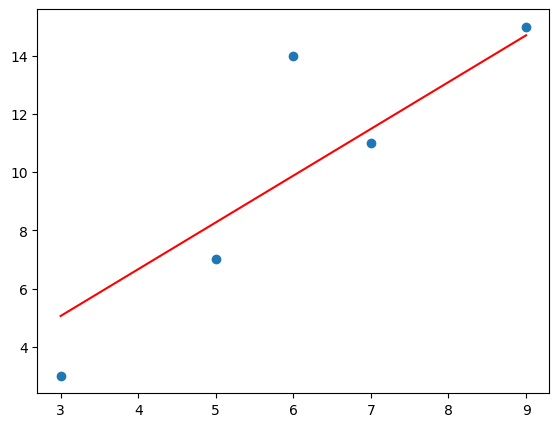

In [10]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [11]:
#Реализуем цикл градиентного спуска
class SimpleRegression2(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*(Y -self.predict(x)).mean()
            dT_a1 = -2*((Y -self.predict(x))*x).mean()
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return a0, a1, steps, errors

Y^ = -2.0 + 2.0*x
MSE после инициализации: 4.000000000000001


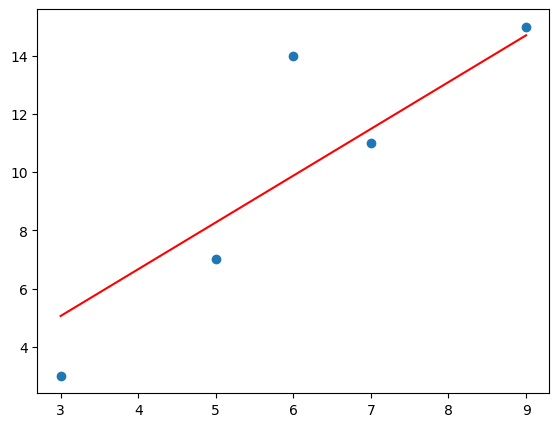

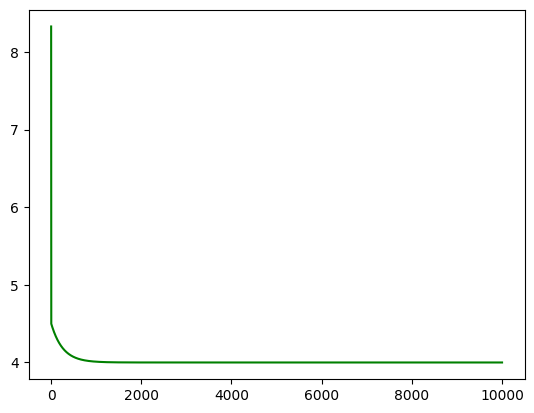

In [12]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.01, epsylon = 0.001, max_steps=10000)
print(f"Y^ = {a0new} + {a1new}*x")
Y_pred2 = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
print(f"MSE после инициализации: {regr2.MSE(x, Y)}")

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

4.000000003881773
8.000000001754989
11.999999999628205
10.000000000691596
15.999999997501419
MSE после градиентного спуска:  4.000000000000001


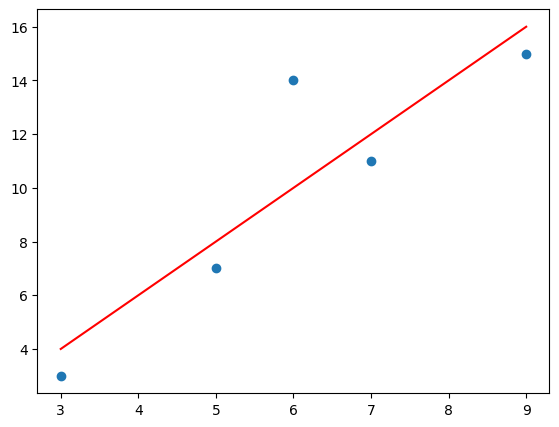

In [13]:
#Выведем график  прогнозов и вычислим MSE
print(regr2.predict(3))
print(regr2.predict(5))
print(regr2.predict(7))
print(regr2.predict(6))
print(regr2.predict(9))
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

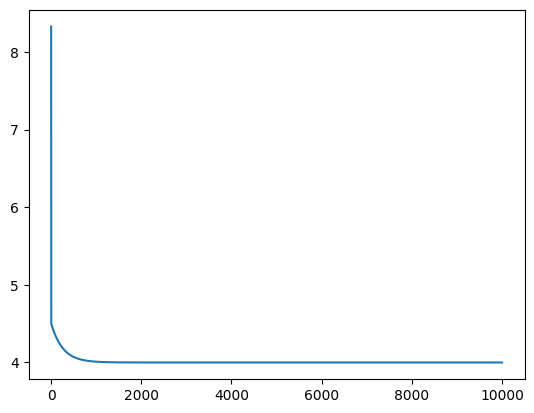

In [14]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [15]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.071585211511637


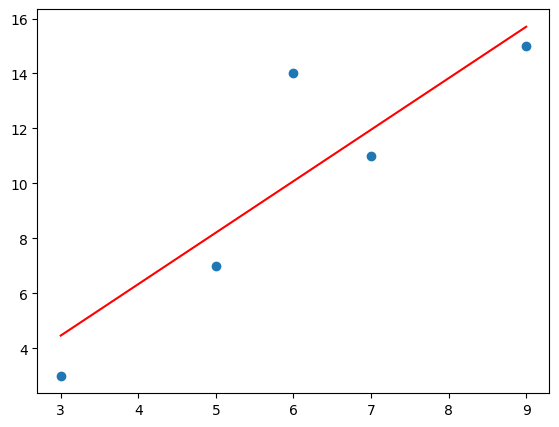

In [16]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

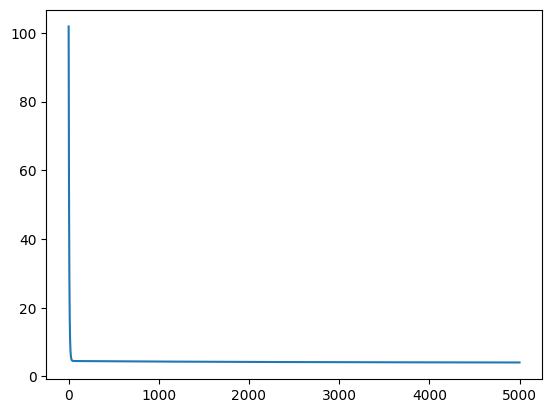

In [17]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.416286681058598


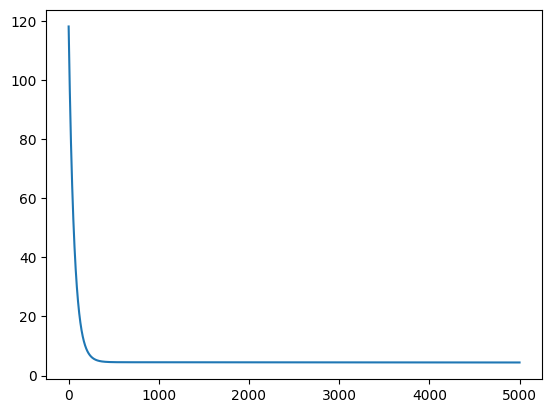

In [18]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ..., 
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Video Games.csv (с помощью pd.read_csv). 

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, платформа, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);
Year_of_Release — год выпуска;
Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);
Publisher — издатель;
NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);
EU_Sales — объемы продаж игры в Европе(в млн долл. США);
Other_Sales — объемы продаж игры в других регионах (в млн долл. США);
Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;
Critic_Count — количество штатных критиков, давших оценки игре;
User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;
User_Count — количество пользователей, давших оценки;
Developer — разработчик;
Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);
JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии. 

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

Вычислите определитель матрицы (x_T*x).

Вычислите вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является двумерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegression.fit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

Попробуйте расширить набор факторных признаков, добавив логарифмы, квадраты, кубы

In [19]:
class MultipleRegression(object):
    def __init__(self, x, Y):
        self.aCoeff = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(Y)
        #self.aCoeff = x.
    def printA(self):
        print(self.aCoeff)
    def predict(self, x):
        # return self.a0 + self.a1*x
        for _ in range(x.shape[0]):
            pass
    def gradient(self, x, Y):
        y_pred = np.dot(x, self.aCoeff)
        grad = -2 * np.dot(x.T, (Y - y_pred)) / len(Y)
        return grad
    def MSE(self, x, Y):
        y_pred = np.dot(x, self.aCoeff)
        mse = np.mean((Y - y_pred) ** 2)
        return mse
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            # for a in self.aCoeff:
            #     dT_a0 = -2*(Y -self.predict(x)).mean()
            #     dT_a1 = -2*((Y -self.predict(x))*x).mean()
            #     self.a0 -= alpha*dT_a0
            #     self.a1 -= alpha*dT_a1
            #     new_error = self.MSE(x, Y)
            #     step += 1
            #     steps.append(step)
            #     errors.append(new_error)

            loss = self.MSE(x, Y)
            grad = self.gradient(x, Y)
            self.aCoeff -= alpha * grad
            if loss < epsylon:
                break
            errors.append(loss)
        # return a0, a1, steps, errors

In [5]:
from sklearn.preprocessing import OneHotEncoder

videogames = pd.read_csv(r"Video_Games.csv", index_col = 'id')
videogames.head()
Y = videogames['jp_sales']

x = videogames.drop('jp_sales', axis=1)

x = pd.concat([x, pd.get_dummies(x['platform'], drop_first=True, dtype = float),
                pd.get_dummies(x['genre'], drop_first=True, dtype = float),
                pd.get_dummies(x['publisher'], drop_first=True, dtype = float)], axis = 1)
ohe = OneHotEncoder()

# x = pd.concat([x, ohe.fit_transform(x['platform']), ohe.fit_transform(x['genre']), ohe.fit_transform(x['publisher'])])

x = x.drop(['platform', 'genre', 'publisher'], axis = 1)

Y.head()
x.head()
x_ = x
x_.insert(0, "intercept", np.ones((x.shape[0],1)), allow_duplicates=True)                
x_ = x_.sort_index()

In [21]:
class MultipleRegression(object):
    def __init__(self, x, Y):
        self.aCoeff = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(Y)
    def printA(self):
        print(self.aCoeff)
    def predict(self, x):
        # return self.a0 + self.a1*x
        for _ in range(x.shape[0]):
            pass
    def gradient(self, x, Y):
        y_pred = np.dot(x, self.aCoeff)
        grad = -2 * np.dot(x.T, (Y - y_pred)) / len(Y)
        print(grad)
        return grad
    def MSE(self, x, Y):
        y_pred = np.dot(x, self.aCoeff)
        mse = np.mean((Y - y_pred) ** 2)
        return mse
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit1(self, x, Y):
        n_samples = len(x)
        # modify x, add 1 column with value 1
        ones = np.ones(len(x))
        features = np.c_[ones, x]
        # initialize the weights matrix
        self.weights = np.zeros(features.shape[1])

        for i in range(self.iters):
            # predicted labels
            y_predicted = np.dot(features, self.weights.T)
            # calculate the error
            error = y_predicted - Y
            print(error)
            # compute the partial derivated of the cost function
            dw = (2 / n_samples) * np.dot(features.T, error)
            # update the weights matrix
            self.weights -= self.lr * dw
    def fit2(self, x, Y, alpha = 0.000001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            # for a in self.aCoeff:
            #     dT_a0 = -2*(Y -self.predict(x)).mean()
            #     dT_a1 = -2*((Y -self.predict(x))*x).mean()
            #     self.a0 -= alpha*dT_a0
            #     self.a1 -= alpha*dT_a1
            #     new_error = self.MSE(x, Y)
            #     step += 1
            #     steps.append(step)
            #     errors.append(new_error)

            loss = self.MSE(x, Y)
            grad = self.gradient(x, Y)
            self.aCoeff -= alpha * grad
            print(loss)
            if loss < epsylon:
                break
            errors.append(loss)
        # return a0, a1, steps, errors

In [22]:
#Вычислим определитель (x_T*x).
x_dropped = x_.drop(x_.loc[2:5633].index)
# x_dropped
det = x_.T.dot(x_)
# det = x_.T * x
det

,intercept,year,na_sales,eu_sales,other_sales,3DS,DC,DS,GB,GBA,...,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zushi Games,dramatic create,imageepoch Inc.
intercept,4258.00,8.544002e+06,1.585000e+03,9.837600e+02,314.4600,252.00,37.00,546.00,64.00,110.00,...,1.00,2.0,9.0,1.0,1.0,1.0,2.00,1.00,4.0,2.0
year,8544002.00,1.714438e+10,3.177097e+06,1.974026e+06,631254.6800,507359.00,74005.00,1096280.00,127738.00,220332.00,...,2015.00,4012.0,18085.0,2007.0,1995.0,2007.0,4004.00,2008.00,8062.0,4028.0
na_sales,1585.00,3.177097e+06,7.877674e+03,4.184048e+03,1199.7142,50.74,3.29,122.85,93.57,53.56,...,0.07,0.0,0.0,0.0,0.0,0.0,0.04,0.10,0.0,0.0
eu_sales,983.76,1.974026e+06,4.184048e+03,3.159147e+03,879.2649,39.31,1.59,89.20,37.70,25.09,...,0.04,0.0,0.0,0.0,0.0,0.0,0.03,0.00,0.0,0.0
other_sales,314.46,6.312547e+05,1.199714e+03,8.792649e+02,350.9936,8.30,0.23,25.05,5.78,4.02,...,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zenrin,1.00,2.007000e+03,0.000000e+00,0.000000e+00,0.0000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.0
Zoo Digital Publishing,2.00,4.004000e+03,4.000000e-02,3.000000e-02,0.0100,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,2.00,0.00,0.0,0.0
Zushi Games,1.00,2.008000e+03,1.000000e-01,0.000000e+00,0.0100,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0
dramatic create,4.00,8.062000e+03,0.000000e+00,0.000000e+00,0.0000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,4.0,0.0


In [23]:
x_dropped

,intercept,year,na_sales,eu_sales,other_sales,3DS,DC,DS,GB,GBA,...,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zushi Games,dramatic create,imageepoch Inc.
id,,,,,,,,,,,,,,,,,,,,,
5634,1.0,2015,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5635,1.0,2014,0.25,0.26,0.11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5636,1.0,1999,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5637,1.0,2007,0.02,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5639,1.0,2010,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,1.0,2015,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6079,1.0,2001,0.53,0.16,0.10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6080,1.0,2012,0.31,0.13,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Вычислим вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.
a = np.linalg.inv(x_.T.dot(x_)).dot(x_.T).dot(Y)
a

In [ ]:
mregr = MultipleRegression(np.array(x_), np.array(Y))
mregr.printA()

In [ ]:
mregr.fit(np.array(x_), np.array(Y))
mregr.printA()

In [27]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [28]:
x_

,intercept,year,na_sales,eu_sales,other_sales,3DS,DC,DS,GB,GBA,...,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zushi Games,dramatic create,imageepoch Inc.
id,,,,,,,,,,,,,,,,,,,,,
2,1.0,2009,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2008,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2006,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,2009,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,2015,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,1.0,2015,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6079,1.0,2001,0.53,0.16,0.10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6080,1.0,2012,0.31,0.13,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import numpy as np
# from tqdm.notebook import tqdm

class LinearRegression:
    def __init__(self, learning_rate=1e-10, iter=10000):
        """
        The class constructor.
        params:
        learning_rate= the learning rate
        n_iters=number of iterations on gradient descent
        """
        # initialize learning rate lr and number of iteration iters
        self.lr = learning_rate
        self.iters = iter
        # initialize the weights matrix
        self.weights = None

    def fit(self, X, y):
        """
        Used to calculate the weights matrix of the linear regression model.
        :param X: array, features
        :param y: array, known labels
        :return: None
        """
        n_samples = len(X)
        # modify x, add 1 column with value 1
        ones = np.ones(len(X))
        features = np.c_[ones, X]
        # initialize the weights matrix
        self.weights = np.zeros(features.shape[1])

        for i in range(self.iters):
            # predicted labels
            y_predicted = np.dot(features, self.weights.T)
            # calculate the error
            error = y_predicted - y
            print(error)
            # compute the partial derivated of the cost function
            dw = (2 / n_samples) * np.dot(features.T, error)
            # update the weights matrix
            self.weights -= self.lr * dw

    def predict(self, X):
        """
        Makes predictions

        :param X: array, features
        :return: array, predictions
        """
        # modify the features X by adding one column with value equal to 1
        ones = np.ones(len(X))
        features = np.c_[ones, X]
        # predict the labels matrix
        y_predicted = np.dot(features, self.weights.T)
        return y_predicted


In [3]:
testLinReg = LinearRegression()

In [6]:
testLinReg.fit(np.array(x_), np.array(Y))

[-1.01 -1.31 -1.04 ... -1.06 -1.27 -1.06]
[-1.0090215  -1.30902199 -1.03902296 ... -1.05902004 -1.26902686
 -1.05902588]
[-1.00804379 -1.30804476 -1.03804671 ... -1.05804087 -1.2680545
 -1.05805255]
[-1.00706687 -1.30706833 -1.03707125 ... -1.05706249 -1.26708293
 -1.05708001]
[-1.00609073 -1.30609268 -1.03609657 ... -1.05608489 -1.26611214
 -1.05610824]
[-1.00511538 -1.30511781 -1.03512267 ... -1.05510809 -1.26514213
 -1.05513726]
[-1.00414082 -1.30414373 -1.03414957 ... -1.05413207 -1.2641729
 -1.05416706]
[-1.00316704 -1.30317044 -1.03317724 ... -1.05315683 -1.26320445
 -1.05319765]
[-1.00219404 -1.30219793 -1.0322057  ... -1.05218238 -1.26223678
 -1.05222901]
[-1.00122183 -1.3012262  -1.03123494 ... -1.05120872 -1.26126989
 -1.05126115]
[-1.0002504  -1.30025525 -1.03026496 ... -1.05023584 -1.26030378
 -1.05029407]
[-0.99927975 -1.29928509 -1.02929576 ... -1.04926374 -1.25933845
 -1.04932778]
[-0.99830988 -1.2983157  -1.02832734 ... -1.04829243 -1.25837389
 -1.04836225]
[-0.9973408 

In [7]:
testLinReg.predict(np.array(x_))

array([1.21471945, 1.21411478, 1.21290554, ..., 1.21653333, 1.20806852,
       1.20927768])

In [60]:
Y

id
2830    1.01
3865    1.31
4617    1.04
3675    1.08
1612    1.12
        ... 
3996    1.09
5720    1.29
4579    1.06
4072    1.27
5883    1.06
Name: jp_sales, Length: 4258, dtype: float64